In [1]:
from pylab import *

In [2]:
def Mat_A(x):
    N = len(x)
    N_interior = N-2
    A = zeros( (N_interior,N_interior) )
    for i in range(N_interior-1):
        A[i,i] = -2
        A[i,i+1] = 1
        A[i+1,i] = 1
    A[-1,-1] = -2
    return A

In [3]:
pi

3.141592653589793

In [4]:
x = linspace(0,1,1002)
h = x[1]-x[0]
A = Mat_A(x)
e_val , e_vec = eig(A)
# ordenar eigenvalores y eigenvectores
indices = e_val.argsort()[::-1] #primero es de menor a mayor
e_val = e_val[indices]
e_vec = e_vec[:,indices]
k_s = sqrt(-e_val)/h

[3.14159136 6.28317499]


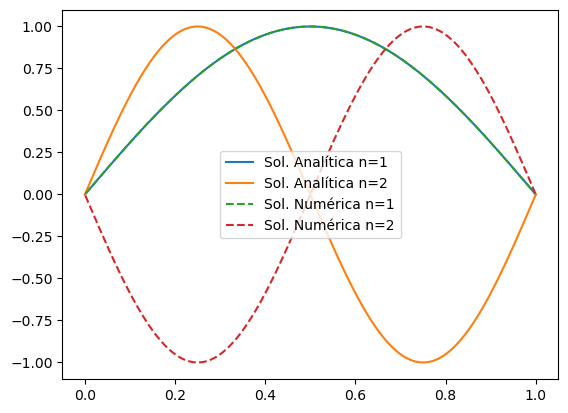

In [5]:
print(k_s[0:2])
plot(x,sin(pi*x),label='Sol. Analítica n=1')
plot(x,sin(2*pi*x),label='Sol. Analítica n=2')
norm1 = abs(e_vec[:,0]).max()
plot(x[1:-1],-e_vec[:,0]/norm1,'--',label='Sol. Numérica n=1')
norm1 = abs(e_vec[:,1]).max()
plot(x[1:-1],-e_vec[:,1]/norm1,'--',label='Sol. Numérica n=2')
legend()
show()

Para una matriz de $100 \times 100$

In [6]:
%%timeit
e_val , e_vec = eig(A)

838 ms ± 56.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
def Mat_A_2D(x,y):
    Nx , Ny = len(x)-2 , len(y)-2
    N_tot = Nx*Ny
    A = zeros( (N_tot,N_tot) )
    dd = -4
    for i in range(Ny-1):
        for j in range(Nx-1):
            A[Ny*i+j,Ny*i+j] = dd
            A[Ny*i+j,Ny*i+j+1] = 1
            A[Ny*i+j+1,Ny*i+j] = 1
            A[Ny*i+j,Ny*(i+1)+j] = 1
            A[Ny*(i+1)+j,Ny*i+j] = 1
    A[-1,-1] = -2
    for j in range(Nx-1):
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j] = dd
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j+1] = 1
        A[Ny*(Ny-1)+j+1,Ny*(Ny-1)+j] = 1
    for i in range(Ny-1):
        A[Ny*i+Nx-1,Ny*i+Nx-1] = dd
        A[Ny*i+Nx-1,Ny*(i+1)+Nx-1] = 1
        A[Ny*(i+1)+Nx-1,Ny*i+Nx-1] = 1
    A[Ny*(Ny-1)+Nx-1,Ny*(Ny-1)+Nx-1] = dd
    return A

In [8]:
x = arange(0,1.05,0.05)
y = arange(0,1.05,0.05)
A2D = Mat_A_2D(x,y)
e_val,e_vec = eig(A2D)
print(sqrt(-sort(e_val.real))/0.1 )

[28.19708028 28.06686608 28.06686608 27.93604493 27.852091   27.852091
 27.72025628 27.72025628 27.55614391 27.55614391 27.50277458 27.42288647
 27.42288647 27.20302747 27.20302747 27.18380077 27.18380077 27.04870902
 27.04870902 26.89994048 26.82578351 26.82578351 26.74125499 26.74125499
 26.60391613 26.60391613 26.51838523 26.51838523 26.37723176 26.37723176
 26.23615384 26.23615384 26.1312593  26.09615687 26.09615687 26.06454391
 26.06454391 25.86502281 25.86502281 25.67763749 25.67763749 25.67057472
 25.67057472 25.54606621 25.54606621 25.53457856 25.53457856 25.29831425
 25.29831425 25.20147021 25.14397455 25.14397455 25.07637456 25.07637456
 24.97212041 24.97212041 24.92986555 24.92986555 24.68781476 24.68781476
 24.66485659 24.66485659 24.56063426 24.56063426 24.44458362 24.44458362
 24.35344517 24.35344517 24.29426482 24.29426482 24.11630569 24.06990755
 24.06990755 24.04581678 24.04581678 23.9313236  23.9313236  23.79602436
 23.79602436 23.70239226 23.70239226 23.64158223 23.6

In [9]:
sqrt(2)*pi/2

2.221441469079183

In [10]:
from scipy.sparse import *
from scipy.sparse.linalg import *

In [11]:
def Mat_A_sp(x):
    N = len(x)
    N_interior = N-2
    A = lil_matrix( (N_interior,N_interior) )
    for i in range(N_interior-1):
        A[i,i] = -2
        A[i,i+1] = 1
        A[i+1,i] = 1
    A[-1,-1] = -2
    return A

In [12]:
x = linspace(0,1,1002)
h = x[1]-x[0]
A_sp = Mat_A_sp(x)
e_val , e_vec = eigsh(A_sp,k=10,which='SM')

In [13]:
sort(sqrt(-e_val)/h)

array([ 3.14159136,  6.28317499,  9.42474315, 12.5662881 , 15.7078021 ,
       18.84927742, 21.99070633, 25.13208109, 28.27339396, 31.4146372 ])

In [14]:
%%timeit
e_val , e_vec = eigsh(A_sp,which='SM')

3.02 s ± 312 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
